#  Experiment 3 : Decision Tree

## Aim : To study and implement Decision Tree

### Theory :

#### Introduction

Decision Trees are classifiers. They classify a the data item into a particular class based on the class column. For example, Considering the outlook, wind speed, temperature and humidity, the decision tree will help the user decide whether to play golf or no.

As the name suggests, the decision trees take a bunch of decisions to reach the final conclusion. Every current decision is based on the outcome of the pervious decisions. Considering each decision a node, All the decisions together will form a decision tree. Each node represents a question and number of branches from that node represent the number of answers for that question.




#### The process

A decision tree is a flow chart like tree structure, where
* Each internal node denotes a test on an attribute
    
* Each branch denotes an outcome of the test

* Each leaf node represent a class

In order to classify an unknown sample, the attribute values of the sample are tested against the decision tree.

![The process example](images/Decision_tree.PNG "The Decision Tree Process Example")

The nodes (Questions) are selected via the greedy approach. That is the root node (First Question) will be selected in such a way that it tries to split the maximum number of records into distintive classes based on the "Gain" of the question which we will discuss below. After the root node is selected, the next node is selected in the similar manner in a iterative process. 

So the idea behind decision tree is to classify the record into a particular class based on the various features and conditions.

![The idea](images/Decision_idea.PNG "The idea" )
<cite> Bishop, “Pattern Recognition and Machine Learning”, Springer, 2006 </cite>

In a decision tree, the order in which the attributes are chosen determines how complicated the tree is. 
There are many algorithms to compute a decision tree, to name a few,
* Hunt's Algorithm (One of the earliest)
* ID3 (Iterative Dichotomiser and Regression Trees)
* C 4.5
* CART (Classification are Regression Tree)


ID3 uses Information Theory to determine most informative attribute. A measure of the information content of a message is the inverse of the probability of receiving the message:

$$Information ( Message ) = \frac {1}{Probability( Message)} $$


**Node purity & impurity:**

Node purity represents how well we split the data.  A pure node is one which classifies the data completely i.e that node has all the data belonging to one class. Whereas a node which has data belonging more than class is an impure node. There are various measures to calculate the purity of the node. Some of the features are as follows:

* Entropy
* Gini Impurity
* Misclassification 

 A visual example
![Node Purity](images\NodePurity.PNG "Node Purity")

**Entropy**

In lay man terms Entropy is uncertainity or impurity. Uncertainity of a node to classify objects. The entropy of a node is based on the probability of the objects belonging to a particular class. 

$$ Entropy (S) = - \sum_{i} P_i * Log_2(P_i) $$

 
Based on Entropy(Uncertainity), We calculate the gain of a attribute. Information Gain also known as Gain of an attribute is used to select the attribute that will best separate the samples into individual classes. The attribute with the maximum gai,n will give us the maximum information and will split maximum number of records ie it will give us the most pure node.


Gain of example set S for a attribute A  is given by:

$$ Gain( S, A) = Entropy (S)- S * \sum_{v} \frac{| S_v |}{ |S| }*Entropy(S_v)$$

So as you can see the entropy of the attribute (A) is getting subtracted from the total entropy. Therefore we can say that, the attribute with the least entropy will have the maximum gain (Since it is getting subtracted from the overall entropy.). Therefore we can conclude that, the attribute with the maximum gain will be selected for splitting.

In this experiment, we will implement decision tree using Sci-kit learn's module : *DecisionTreeClassifier*  So let's go ahead and import the packages required. 


In [2]:
import numpy as np # for numeric operations
import pandas as pd # so store and use dataFrames
#ignoring warnings.
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

Secondly let's import and analyse the dataset. 

** The Car Dataset **


   Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

   * CAR   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;car acceptability
       * PRICE &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;overall price
           * Buying&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Buying price
           * Maint&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;price of the maintenance
       * TECH&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;technical characteristics
           * COMFORT&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;comfort
               * Doors&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;number of doors
               * Persons&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;capacity in terms of persons to carry
               * Lug_boot&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;the size of luggage boot
       * Safety&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;estimated safety of the car
       * Class&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Car Acceptibility 

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts:
PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for
these examples sets see http://www-ai.ijs.si/BlazZupan/car.html).


The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.


Because of known underlying concept structure, this database may be particularly useful for testing constructive induction andstructure discovery methods.



In [3]:
df=pd.read_csv('data/car.csv')
print("Number of Samples",len(df))
df.sample(5)


Number of Samples 1728


,buying,maint,doors,persons,lug_boot,safety,class
125,vhigh,high,2,4,big,high,unacc
1623,low,low,2,2,med,low,unacc
1013,med,high,3,4,med,high,acc
494,high,vhigh,4,2,big,high,unacc
985,med,high,2,4,med,med,unacc


So here you can see that based on the features, the model has to classify whether the car is unacceptable, acceptable, good and very good

In [36]:
# Let`s analyse the data and clean it
set(df['doors'])

{'2', '3', '4', '5more'}

In [37]:
#finding the number of null values in the databasec
df.isnull().sum().sum()

0

Since the model's cannot work with strings, we need to convert then into numerical values, So basically we need to encode them

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
#Encoding the data 
columns=df.columns.tolist()
for c in columns:
    df[c]=encoder.fit_transform(df[c])
# encoding the target data


#let`s view our encoding 
print(df.sample(5))

      buying  maint  doors  persons  lug_boot  safety  class
166        3      0      2        0         1       2      2
798        0      1      1        1         0       1      2
1357       1      3      2        0         0       2      2
690        0      2      1        1         0       1      2
1223       2      1      1        0         0       0      2


In [39]:
target=df['class']
# droping the class column from the dataset.
df=df.drop('class',axis=1)

columns.remove('class')


In [40]:
columns

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

So avoid overfitting of data, we use various methods of validations: In this experiment we will use 2:
* Train_test_split
* Cross validation

In [41]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,target,train_size=.60)

Let's implement our decision tree using entropy.

In [42]:
from sklearn.tree import DecisionTreeClassifier

dc=DecisionTreeClassifier(criterion='entropy')
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)

Now our decision tree is ready using Entropy and train_test_split, Let's have a look at the accuracy of the decision tree.
To check the accuracy , we will be using 
* Confusion matrix
* Accuracy Score
* Classfication Report

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve,classification_report
import matplotlib.pyplot as plt
import itertools
#creating a function to plot confusion matrix.

def plot_confusion_matrix(cm,classes,title="Confusion Matrix",cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [44]:
print("Accuracy Score of Decision tree with entropy is {0}".format(accuracy_score(y_test,y_pred)));
Accuracy_score_train_test_entropy=accuracy_score(y_test,y_pred)
# print("Confusion matrix of Decision tree with entropy is\n {0}".format(confusion_matrix(y_test,y_pred)))
print("\nClassification report of Decision tree with entropy is\n {0}".format(classification_report(y_test,y_pred)))

Accuracy Score of Decision tree with entropy is 0.9552023121387283

Classification report of Decision tree with entropy is
              precision    recall  f1-score   support

          0       0.86      0.95      0.90       152
          1       0.81      0.68      0.74        31
          2       0.99      0.98      0.99       474
          3       1.00      0.91      0.96        35

avg / total       0.96      0.96      0.96       692



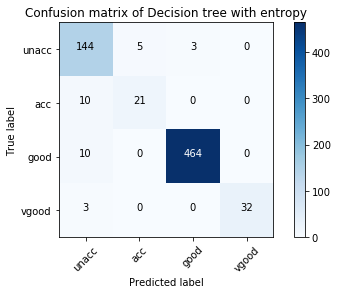

In [45]:
#ploting confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred), classes=set(encoder.inverse_transform(target)),
                      title='Confusion matrix of Decision tree with entropy')
plt.show()

** Gini Impurity **

Used by the CART (classification and regression tree) algorithm, Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be computed by summing the probability $f_i$ an item with label $i$ being chosen times the probability $ 1- f_i$ of a mistake in categorizing that item. It reaches its minimum (zero) when all cases in the node fall into a single target category. 

To compute Gini Impurity for a set of items with $J$ classes suppose $i \in { 1, 2, ... , J} $ and let $f_i$ be the fraction of items labeled with class i in the set.

**$I_G(f) = \sum_{i=1}^{J} f_i(1- f_i) = \sum_{i=1}^{J} f_i - \sum_{i=1}^{J} f_i^2 = 1 - \sum_{i=1}^{J} f_i^2 = \sum_{i \ne k }f_i f_k $**

<cite>https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity</cite>

** Gini Index **

The Gini coefficient (or Gini ratio) G is a summary statistic of the Lorenz curve and a measure of inequality in a population

CART : Classification and Regression Tree uses Gini Index. It is algorithm which draws a decision tree which can be used to classify data into classes or predict a value. 
    
Classification Tree:

When decision or target variable is categorical, the decision tree is classification decision tree.  e.g. predicting whether customer will default or not (Binary Target variable). Or predicting food choices of the customers (nominal variable) using set of independent variable is an example of Classification Decision Tree.

Regression Tree:

 When the decision or target variable is continuous variable, the decision tree is called regression decision tree. e.g. predicting house prices using attributes of houses such as size of a house, type of house (independent, apartment etc) and others. The independent variables can continuous and categorical variables.
 
The impurity (or purity) measure used in building decision tree in CART is Gini Index.


** Gini Index **

*$$Gini =\sum_{i \ne j} p(i)p(j) $$* 

Consider an example, target variable is Binary variable which means it take two values (Yes and No). There can be 4 combinations.
|1|1|
|0|0|

$ P(Target=1).P(Target=1) + P(Target=1).P(Target=0) + P(Target=0).P(Target=1) + P(Target=0).P(Target=0) = 1 $

$ P(Target=1).P(Target=0)  + P(Target=0).P(Target=1)   = 1 – P^2(Target=0) – P^2(Target=1)$

Gini Index for Binary Target variable is

$ = 1 – P^2(Target=0) – P^2(Target=1) $

$ = 1 - \sum_{t=0}^{t=1} P_t^2 $

pt : Proportion of observations with target variable value t. In Binary t takes value 0 and 1.




<cite>http://www.ke.tu-darmstadt.de/lehre/archiv/ws0809/mldm/dt.pdf </cite>

Now, let's create the decision tree using Gini Index.

In [46]:
dc=DecisionTreeClassifier(criterion='gini')
dc.fit(X_train,y_train)
y_pred=dc.predict(X_test)

Let' check the accuracy of the decision tree

In [47]:
print("Accuracy Score of Decision tree with Gini is {0}".format(accuracy_score(y_test,y_pred)));
Accuracy_score_train_test_Gini=accuracy_score(y_test,y_pred)
# print("Confusion matrix of Decision tree with Gini is\n {0}".format(confusion_matrix(y_test,y_pred)))
print("\nClassification report of Decision tree with Gini is\n {0}".format(classification_report(y_test,y_pred)))

Accuracy Score of Decision tree with Gini is 0.9508670520231214

Classification report of Decision tree with Gini is
              precision    recall  f1-score   support

          0       0.85      0.95      0.90       152
          1       0.81      0.68      0.74        31
          2       0.99      0.97      0.98       474
          3       1.00      0.91      0.96        35

avg / total       0.95      0.95      0.95       692



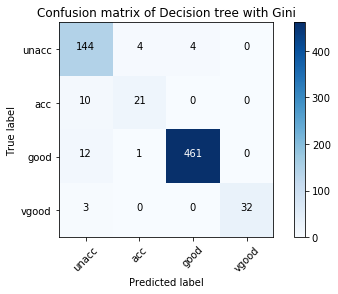

In [48]:
#confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test,y_pred), classes=set(encoder.inverse_transform(target)),
                      title='Confusion matrix of Decision tree with Gini')
plt.show()

In the above two cases, we used train_test_split, to overcome overfitting, now we will use cross validation

Let's implement the decision trees using KFold cross validation

In [49]:
from sklearn.cross_validation import KFold


def run_cv(X,y,criterion):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    dc=DecisionTreeClassifier(criterion=criterion)
    for train_index, test_index in kf:
        X_train,X_test=X[train_index],X[test_index]
        y_train=y[train_index]
#         print(X_train.shape,y_train.shape)
        dc.fit(X_train.T,y_train)
        y_pred[test_index]=dc.predict(X_test.T)
        
#         print(X_train.shape,X_test.shape)
    return y_pred

y_pred_entropy=run_cv(df.T,target,'entropy')
y_pred_gini=run_cv(df.T,target,'gini')

In [50]:
print("Accuracy Score of Decision tree with Entropy is {0}".format(accuracy_score(target,y_pred_entropy)));
Accuracy_score_Cross_validation_Entropy=accuracy_score(target,y_pred_entropy)
# print("Confusion matrix of Decision tree with Gini is\n {0}".format(confusion_matrix(target,y_pred_gini)))
print("\nClassification report of Decision tree with Entropy is\n {0}".format(classification_report(target,y_pred_entropy)))

Accuracy Score of Decision tree with Entropy is 0.9780092592592593

Classification report of Decision tree with Entropy is
              precision    recall  f1-score   support

          0       0.96      0.95      0.95       384
          1       0.87      0.88      0.88        69
          2       0.99      1.00      0.99      1210
          3       0.97      0.92      0.94        65

avg / total       0.98      0.98      0.98      1728



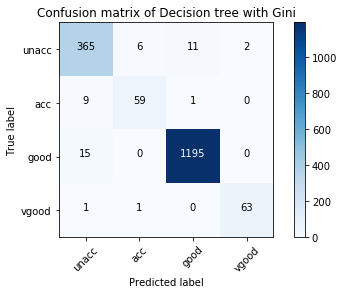

In [51]:
plt.figure()
plot_confusion_matrix(confusion_matrix(target,y_pred_gini), classes=set(encoder.inverse_transform(target)),
                      title='Confusion matrix of Decision tree with Gini')
plt.show()

In [52]:
print("Accuracy Score of Decision tree with Gini is {0}".format(accuracy_score(target,y_pred_gini)));
Accuracy_score_Cross_validation_Gini=accuracy_score(target,y_pred_gini)
# print("Confusion matrix of Decision tree with Entropy is\n {0}".format(confusion_matrix(target,y_pred_entropy)))
print("\nClassification report of Decision tree with Gini is\n {0}".format(classification_report(target,y_pred_gini)))

Accuracy Score of Decision tree with Gini is 0.9733796296296297

Classification report of Decision tree with Gini is
              precision    recall  f1-score   support

          0       0.94      0.95      0.94       384
          1       0.89      0.86      0.87        69
          2       0.99      0.99      0.99      1210
          3       0.97      0.97      0.97        65

avg / total       0.97      0.97      0.97      1728



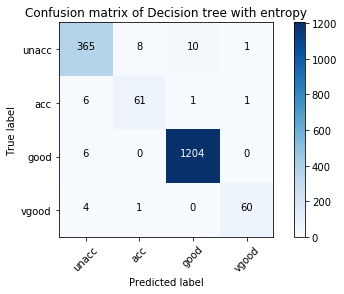

In [53]:
plt.figure()
plot_confusion_matrix(confusion_matrix(target,y_pred_entropy), classes=set(encoder.inverse_transform(target)),
                      title='Confusion matrix of Decision tree with entropy')
plt.show()

** Solution to  the problem of overfitting **

The problem of overfitting can be solved by using the following concepts:
* Using Random Forests
* Implementing Tree pruning
* Bagging 
* Boosting

So let's go ahead and tabulate our results

In [54]:
import prettytable as pt
from IPython.core.display import display, HTML
print("Accuracy Score Table")
table=pt.PrettyTable(['Model Selection','Gini Index','Entropy'])
table.add_row(["Train_test_Split",Accuracy_score_train_test_Gini,Accuracy_score_train_test_entropy])
table.add_row(["Cross Validation",Accuracy_score_Cross_validation_Gini,Accuracy_score_Cross_validation_Entropy])
display(HTML(table.get_html_string()))

Accuracy Score Table


Model Selection,Gini Index,Entropy
Train_test_Split,0.950867052023,0.955202312139
Cross Validation,0.97337962963,0.978009259259


** Drawing our most accurate decision tree **

In [58]:
from sklearn.tree import export_graphviz

In [56]:
class_names=list(set(encoder.inverse_transform(target)))
ddata=export_graphviz(dc,
                      out_file           = None,
                      feature_names      =columns,
                      class_names        =class_names,
                      filled             =True,
                      rounded            =True,
                      special_characters = True
                     )

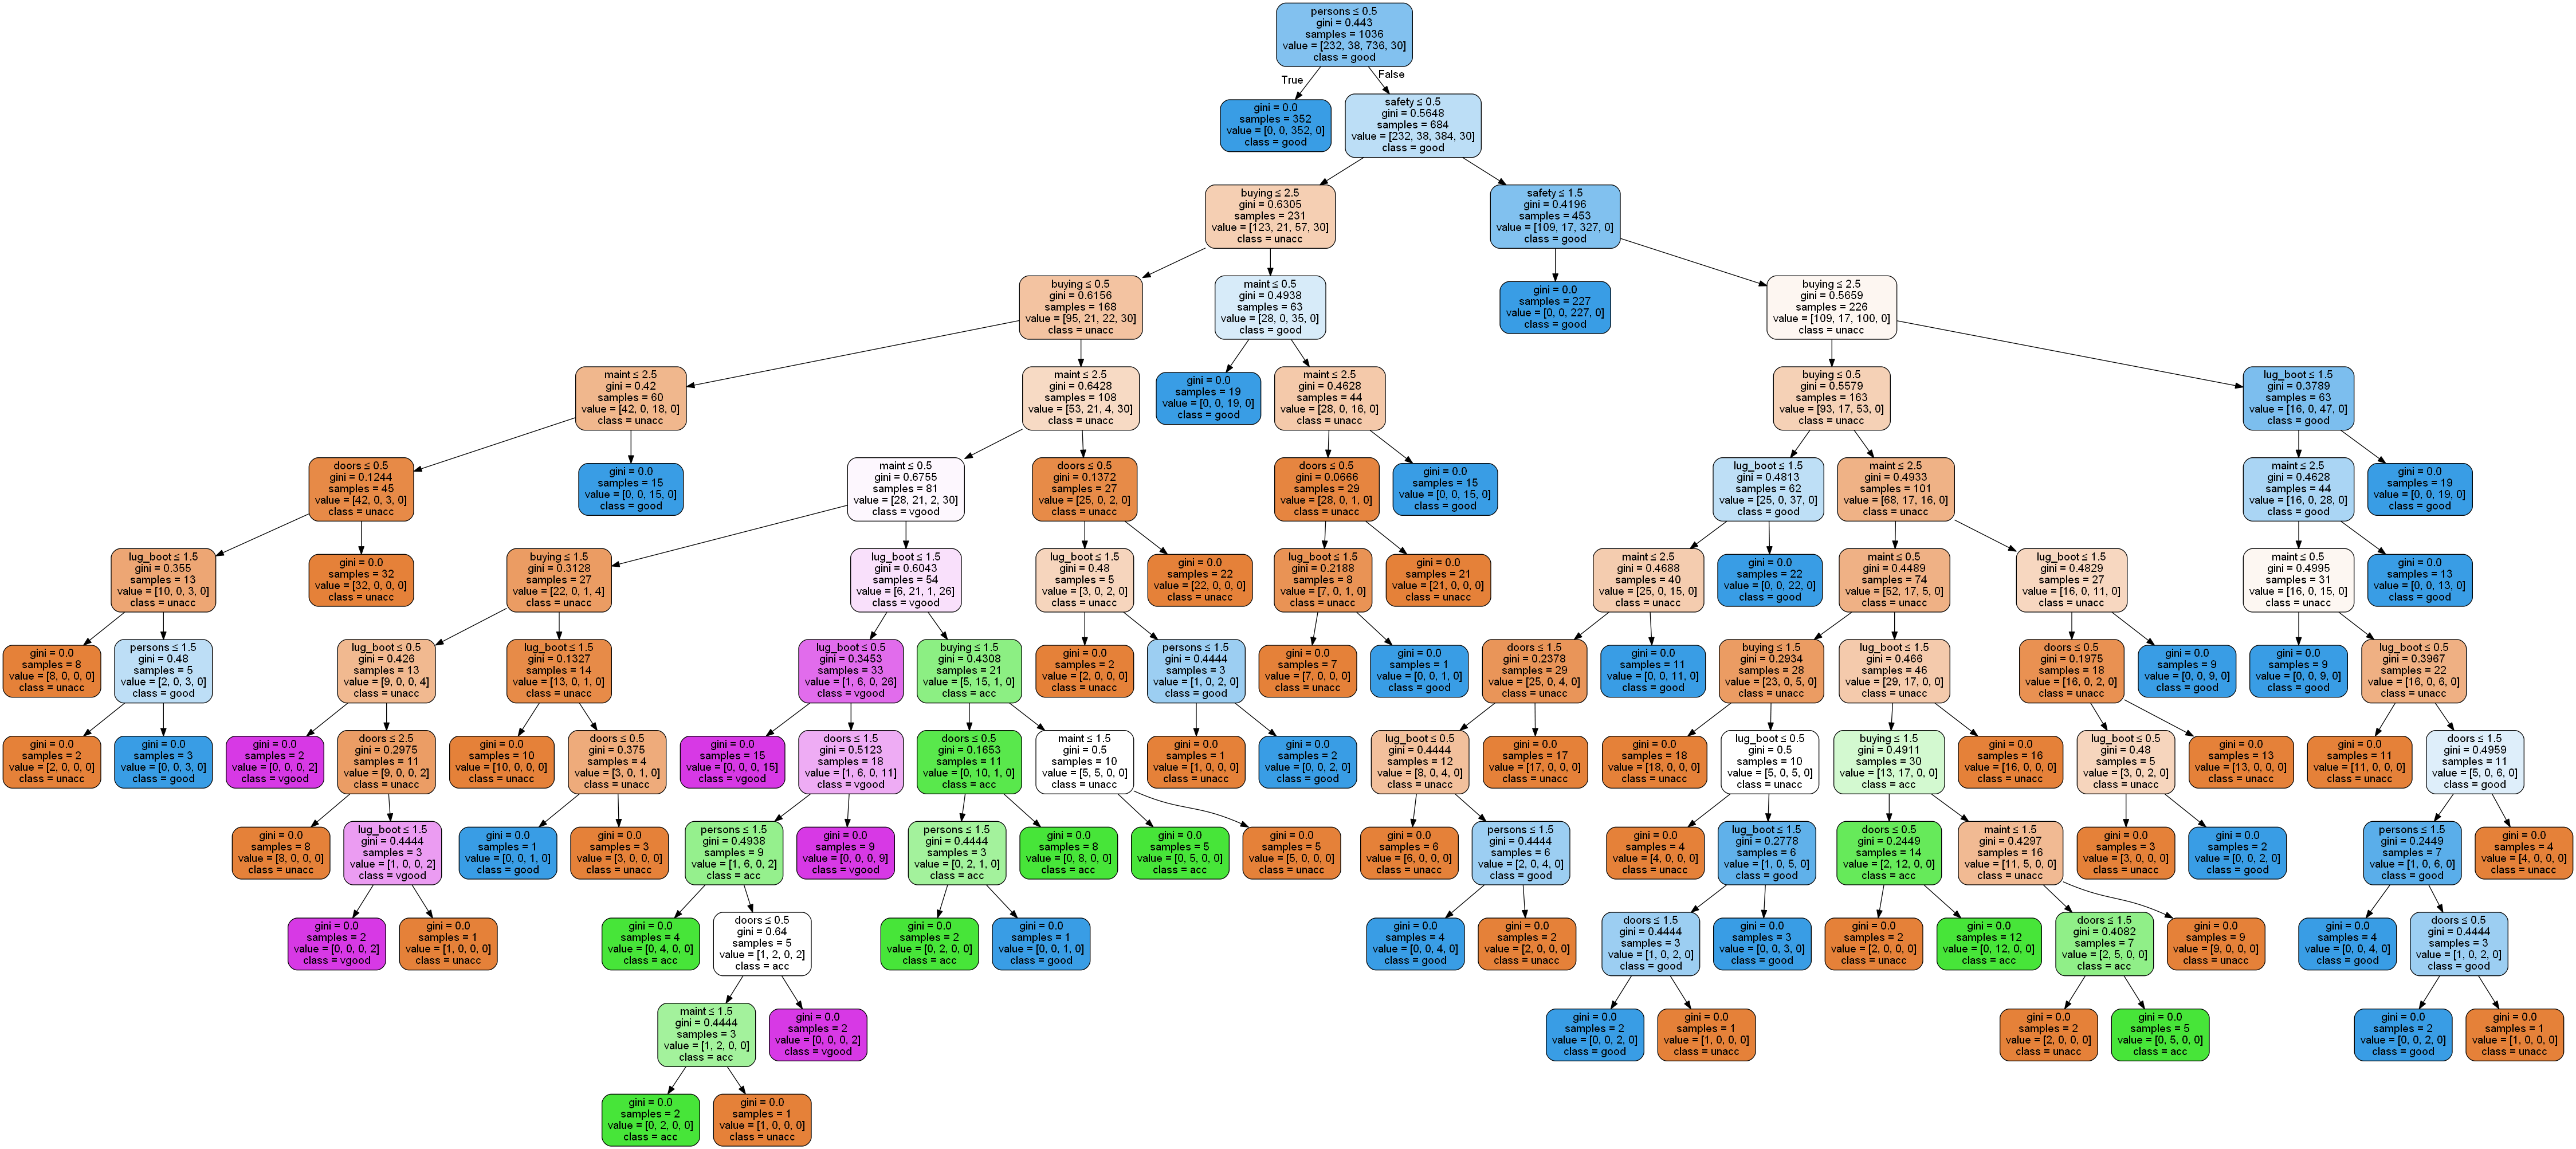

In [59]:
from IPython.display import Image
import pydotplus

graph = pydotplus.graph_from_dot_data(ddata)
Image(graph.create_png())

####  Conclusion

Firstly, Decision trees are subjected to overfitting. Secondly, We can conclude Gini Index yields more accurate result over entropy and Cross Validation is better than train test split 